In [ ]:
import pandas_datareader as pdr
key = "eec1602c1b42c0fe5f798172bc32a64332548ea0"

In [ ]:
df = pdr.get_data_tiingo("RELI" ,. api_key = key)

/usr/local/lib/python3.9/dist-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [ ]:
df.to_csv("RELI.csv")

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('RELI.csv')

In [ ]:
df2 = df.reset_index()['close']

In [ ]:
df2[1228:]

1228    4.62
1229    4.25
1230    3.55
1231    3.88
1232    4.27
1233    3.88
1234    2.90
1235    2.58
1236    2.74
Name: close, dtype: float64

In [ ]:
df.head()

In [ ]:
df.shape

(1237, 14)

In [ ]:
df.tail(10)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1227,RELI,2023-03-08 00:00:00+00:00,5.04,5.1600,4.910,5.16,17378,5.04,5.1600,4.910,5.16,17378,0.0,1.0
1228,RELI,2023-03-09 00:00:00+00:00,4.62,5.0608,4.620,4.93,33148,4.62,5.0608,4.620,4.93,33148,0.0,1.0
1229,RELI,2023-03-10 00:00:00+00:00,4.25,4.8200,4.210,4.61,31533,4.25,4.8200,4.210,4.61,31533,0.0,1.0
1230,RELI,2023-03-13 00:00:00+00:00,3.55,4.2300,3.540,4.14,40335,3.55,4.2300,3.540,4.14,40335,0.0,1.0
1231,RELI,2023-03-14 00:00:00+00:00,3.88,4.0000,3.400,3.68,77352,3.88,4.0000,3.400,3.68,77352,0.0,1.0
1232,RELI,2023-03-15 00:00:00+00:00,4.27,4.3000,3.760,3.76,469095,4.27,4.3000,3.760,3.76,469095,0.0,1.0
1233,RELI,2023-03-16 00:00:00+00:00,3.88,4.2000,3.640,4.10,299485,3.88,4.2000,3.640,4.10,299485,0.0,1.0
1234,RELI,2023-03-17 00:00:00+00:00,2.90,3.8000,2.900,3.80,198960,2.90,3.8000,2.900,3.80,198960,0.0,1.0
1235,RELI,2023-03-20 00:00:00+00:00,2.58,2.9811,2.545,2.93,87798,2.58,2.9811,2.545,2.93,87798,0.0,1.0
1236,RELI,2023-03-21 00:00:00+00:00,2.74,2.7500,2.500,2.59,193224,2.74,2.7500,2.500,2.59,193224,0.0,1.0


In [ ]:
df1 = df.reset_index()['close']


In [ ]:
df1.shape

(1237,)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

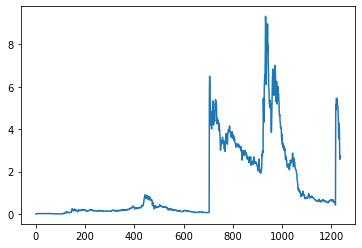

In [ ]:
plt.plot(df1)

In [ ]:
df1


0       0.00500
1       0.00400
2       0.00580
3       0.00541
4       0.00570
         ...   
1232    4.27000
1233    3.88000
1234    2.90000
1235    2.58000
1236    2.74000
Name: close, Length: 1237, dtype: float64

In [ ]:
# lstm are sensitive to scale

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0 ,1))
df1 = scaler.fit_transform(np.array(df1).reshape( -1, 1))

In [ ]:
df1.shape

(1237, 1)

In [ ]:
training_size = int(len (df1)*0.65)
test_size  = len(df1) - training_size
train_data , test_data = df1[0 : training_size  , : ] , df1[training_size : len(df1) , : 1]

In [ ]:
training_size ,  test_size

(804, 433)

In [ ]:
import numpy as np
#converting an array of values into a dataset matrix
def create_dataset(dataset , time_step = 1):
  dataX , dataY = [] , []
  for i in range(len(dataset) - time_step - 1):
    a = dataset[i : (i  + time_step) , 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step , 0])
  return np.array(dataX) , np.array(dataY)


In [ ]:
time_step = 100
X_train , y_train = create_dataset(train_data , time_step)
X_test , ytest = create_dataset(test_data , time_step)

In [ ]:
print(X_train)

[[1.07342207e-04 0.00000000e+00 1.93215973e-04 ... 2.57621297e-04
  2.57621297e-04 2.57621297e-04]
 [0.00000000e+00 1.93215973e-04 1.51352512e-04 ... 2.57621297e-04
  2.57621297e-04 3.00558179e-04]
 [1.93215973e-04 1.51352512e-04 1.82481752e-04 ... 2.57621297e-04
  3.00558179e-04 4.50837269e-04]
 ...
 [7.29927007e-03 7.19192787e-03 7.03091456e-03 ... 4.16058394e-01
  3.84929154e-01 3.99957063e-01]
 [7.19192787e-03 7.03091456e-03 6.60154573e-03 ... 3.84929154e-01
  3.99957063e-01 3.99957063e-01]
 [7.03091456e-03 6.60154573e-03 9.22069558e-03 ... 3.99957063e-01
  3.99957063e-01 4.02103907e-01]]


In [ ]:
print(X_train.shape) , print(y_train.shape )

(703, 100)
(703,)


(None, None)

In [ ]:
print(X_test.shape) , print(ytest.shape)

(332, 100)
(332,)


(None, None)

In [ ]:
X_train  = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test  = X_test.reshape(X_test.shape[0] ,X_test.shape[1] , 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50 , return_sequences = True , input_shape =(100 , 1)))
model.add(LSTM(50 , return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer = 'adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train ,y_train, validation_data  = (X_test , ytest) , epochs =100 , batch_size = 64 , verbose = 1)

Epoch 1/100
11/11 [==============================] - 17s 335ms/step - loss: 0.0134 - val_loss: 0.0201
Epoch 2/100
11/11 [==============================] - 3s 316ms/step - loss: 0.0048 - val_loss: 0.0155
Epoch 3/100
11/11 [==============================] - 2s 214ms/step - loss: 0.0037 - val_loss: 0.0152
Epoch 4/100
11/11 [==============================] - 2s 211ms/step - loss: 0.0032 - val_loss: 0.0135
Epoch 5/100
11/11 [==============================] - 2s 213ms/step - loss: 0.0028 - val_loss: 0.0118
Epoch 6/100
11/11 [==============================] - 2s 222ms/step - loss: 0.0028 - val_loss: 0.0112
Epoch 7/100
11/11 [==============================] - 3s 320ms/step - loss: 0.0027 - val_loss: 0.0104
Epoch 8/100
11/11 [==============================] - 2s 208ms/step - loss: 0.0026 - val_loss: 0.0099
Epoch 9/100
11/11 [==============================] - 2s 214ms/step - loss: 0.0026 - val_loss: 0.0096
Epoch 10/100
11/11 [==============================] - 2s 194ms/step - loss: 0.0025 - val_l

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.11.0'

In [ ]:
# prediction and performance metrics
train_predict  = model.predict(X_train)
test_predict = model.predict(X_test)

11/11 [==============================] - 0s 42ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train , train_predict))

1.3784235649506023

In [ ]:
math.sqrt(mean_squared_error(ytest , test_predict))

2.804383487139894

In [ ]:
import numpy

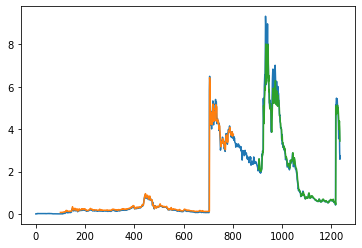

In [ ]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[ : , :] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back , : ] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:  , :]= numpy.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1 : len(df1) -1 , : ]= test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [ ]:
x_input = test_data[341 : ].reshape(1 , -1)
x_input.shape

(1, 92)

In [ ]:
x_input = test_data[341 : ].reshape(1 , -1)

In [ ]:
x_input.shape

(1, 92)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i < 30):
  if(len(temp_input) > 100):

    x_input = np.array(temp_input[1 : ])
    print("{} day input {}".format(i , x_input))
    x_input  = x_input.reshape(1 , -1)
    x_input = x_input.reshape((1 , n_steps , 1))
    # x_input  = x_input.reshape((1 , x_input))
    yhat = model.predict(x_input  , verbose = 0 )
    print("{} day output {}".format(i , yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input  = temp_input[1:]
    lst_output.extend(yhat.tolist())
    i = i +1
  else:

    x_input = x_input.reshape(1 , n_steps ,1 )
    yhat = model.predict(x_input , verbose = 0 )
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i= i + 1

print(lst_output)





0 day input [0.06343924 0.06322456 0.06557535 0.06955775 0.07481752 0.06987978
 0.06883856 0.06613353 0.0677222  0.06303134 0.06075569 0.06166584
 0.06186131 0.06290253 0.06235509 0.06182911 0.06469515 0.07030915
 0.07121082 0.06866681 0.07256333 0.07245599 0.07041649 0.0664985
 0.06738944 0.06624088 0.06543581 0.06397596 0.06182911 0.06182911
 0.0612924  0.06504938 0.0661228  0.06394375 0.06134607 0.06182911
 0.06053027 0.059693   0.05967153 0.05873766 0.05539931 0.05703091
 0.05831902 0.05860884 0.0596286  0.06613353 0.06507085 0.06558609
 0.0661228  0.06545728 0.07084586 0.07213396 0.06955775 0.06934307
 0.0709532  0.06742164 0.06720696 0.06504938 0.06558609 0.07141477
 0.07138257 0.07150064 0.06875268 0.06311722 0.05807213 0.05878059
 0.06182911 0.06108845 0.06045513 0.05849077 0.05413267 0.04491198
 0.55184629 0.5266316  0.56633748 0.58565908 0.57814513 0.54594246
 0.58137613 0.552383   0.54594246 0.54057535 0.49549163 0.45577501
 0.38063547 0.41605839 0.45792185 0.41605839 0.3108

In [ ]:
day_new = np.arange(1 , 101)
day_pred = np.arange(101 , 131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1237

In [ ]:
df3  = df1.tolist()
df3.extend(lst_output)

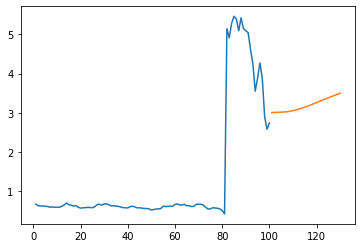

In [ ]:
plt.plot(day_new , scaler.inverse_transform(df1[1137 : ]))
plt.plot(day_pred , scaler.inverse_transform(lst_output))

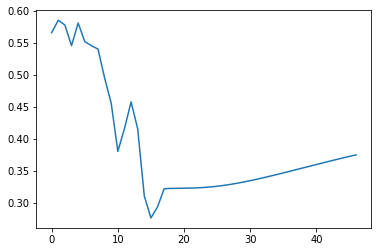

In [ ]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1220 :])